In [2]:
from io import *
from ultralytics import YOLO
import cv2

In [3]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

In [4]:
def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  if labels == []:
    labels = {1: 'agal spot', 2: 'Anthracnose', 3: 'leftblinght', 4: 'sooty mold'}
  if colors == []:
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2)]
  
  for box in boxes:
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  return image

In [5]:
def imageInput(image_file):

        img = cv2.imread(image_file)

        model = YOLO('best.pt')
        pred = model.predict(img)

        output = plot_bboxes(img, pred[0].boxes.boxes, score=False)

        for result in pred:
                boxess = result.boxes
                cls_all = boxess.cls.tolist()

        return cls_all , output

In [6]:
pred_cls , image = imageInput("D:/Durian_Project/dataset/dataset_raw/dataset_raw_opti/train/images/52493163-EED8-40F9-9418-6222224ECC78_jpeg.rf.48116919fabdf814ac760a4d9029c279.jpg")


0: 640x640 1 Anthracnose, 216.9ms
Speed: 4.0ms preprocess, 216.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


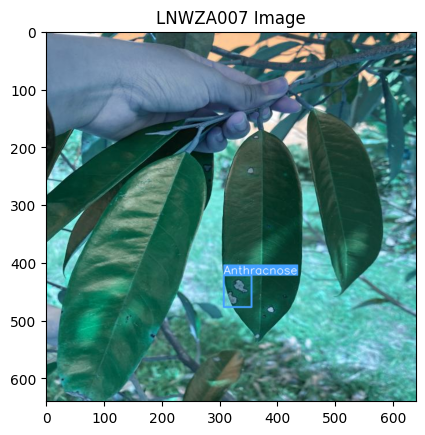

In [15]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("LNWZA007 Image")
 
plt.imshow(image)
plt.show()

In [4]:
def send_file_data(filepath):
    img = Image.open(filepath)
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = buffered.getvalue()
    return img_str

In [6]:
from io import *
from PIL import Image
print(send_file_data(r"D:\Durian_Project\API\runs\detect\predict\image0.jpg"))

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x80\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\

In [ ]:
with open('image.png', 'rb') as f:
        image_bytes = f.read()

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.staticfiles import StaticFiles
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import numpy as np
from io import BytesIO
from PIL import Image
import tensorflow as tf 
import cv2

app = FastAPI()


@app.get("/ping")
async def ping():
    return "Hello, I am alive"

def read_file_as_image(data) -> np.ndarray:
    image = np.array(Image.open(BytesIO(data)))
    return image

@app.post("/predict")
async def predict(
    file: UploadFile = File(...)
):
    image = read_file_as_image(await file.read())
    imgori = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    img = cv2.resize(imgori ,(256,256))
    rimg = np.array(img)
    rimg = rimg.astype('float32')
    rimg /= 255
    rimg = np.reshape(rimg ,(1,256,256,3))

    predictions = model.predict(rimg)

    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) 
    return {
        'class': predicted_class,
        'confidence': float(confidence),
    }

if __name__ == "__main__":
    uvicorn.run(app, host='localhost', port=8000)


In [ ]:
from fastapi import FastAPI
from fastapi.responses import FileResponse

app = FastAPI()

@app.get("/image")
async def get_image():
    # สมมุติว่ารูปภาพอยู่ในโฟลเดอร์ static ของ FastAPI
    # และชื่อไฟล์คือ image.jpg
    filename = "static/image.jpg"
    return FileResponse(filename, media_type="image/jpeg")

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import FileResponse
from fastapi.staticfiles import StaticFiles
from fastapi.middleware.cors import CORSMiddleware
import uvicorn
import numpy as np
from io import *
from PIL import Image, ImageDraw, ImageFont
from ultralytics import YOLO
import cv2
import os

def read_file_as_image(data) -> np.ndarray:
    image = np.array(Image.open(BytesIO(data)))
    return image

app = FastAPI()

@app.get("/ping")
async def ping():
    return "Hello, I am alive"

@app.post("/predict")
async def predict(
    file: UploadFile = File(...)
):
    image = read_file_as_image(await file.read())
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    model = YOLO('best.pt')
    pred = model.predict(image ,save=True, save_crop=True)
    filename = 'D:/Durian_Project/API/runs/detect/predict/image0.jpg'
    # all_file = []
    # if len(os.listdir("./runs/detect/predict/crops")) != 0 :
    #       all_file.append([])
    # else :
    #       label_all = []
    #       for catagory in os.listdir("D:/Durian_Project/API/runs/detect/predict/crops"):
    #             for label_img in os.listdir(f"D:/Durian_Project/API/runs/detect/predict/crops/{catagory}"):
    #                   file_name_label = f"D:/Durian_Project/API/runs/detect/predict/crops/{catagory}/{label_img}"
    #                   label_all.append({
    #                                     'image' : FileResponse(file_name_label, media_type="image/jpeg"),
    #                                     'class' : catagory
    #                                   })
    #       all_file.append(label_all)
    
    # all_file.append([{image : FileResponse(filename, media_type="image/jpeg")}])

    # return all_file
    return {image : FileResponse(filename, media_type="image/jpeg")}
                      
if __name__ == "__main__":
    uvicorn.run(app, host='localhost', port=8000)


In [9]:
import os
os.listdir("./runs/detect/predict/crops")

['Anthracnose']

In [12]:
os.rmdir("runs/detect/predict")

OSError: [WinError 145] The directory is not empty: 'runs/detect/predict'

In [14]:
import os

folder_path = "./runs/detect/predict"

for filename in os.listdir(folder_path):
    print(filename)

crops
image0.jpg


In [16]:
import os
import shutil

def delete_dir_contents(dir_path):
    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isfile(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)

# Example usage
dir_path = './runs/detect'
delete_dir_contents(dir_path)

In [37]:
import requests
import base64
import json

url = 'https://bbba-2001-fb1-182-990a-6df2-e68b-2d4e-f9dd.ngrok-free.app/predict'
filename = r"D:\Durian_Project\dataset\dataset_raw\dataset_raw_opti\test\images\IMG20211206112846_jpg.rf.9d46dc3e1c0d47736201fba29b212a43.jpg"

with open(filename, 'rb') as file:
    file_content = file.read()

payload = {'file': file_content}

response = requests.post(url, files=payload)
data = json.loads(response.content.decode('utf-8'))
data[0]['image']['body']

img_data = base64.b64decode(data[0]['image']['body'])
with open('response.png', 'wb') as f:
    f.write(img_data)

In [21]:
response.content

TypeError: 'int' object is not subscriptable

In [4]:
import os
'crops' in os.listdir("./runs/detect/predict")

False

In [3]:
os.listdir("./runs/detect/predict")

['image0.jpg']

In [24]:
from ultralytics import YOLO
model = YOLO('best.pt')
image = r'D:\Durian_Project\dataset\dataset_raw\dataset_raw_opti\train\images\IMG_4712_JPG.rf.9b2e2be05ffb550aa451dfdea34a8806.jpg'
pred = model.predict(image ,save=True, save_crop=True ,save_conf=True, save_txt=True)
print(pred)


image 1/1 D:\Durian_Project\dataset\dataset_raw\dataset_raw_opti\train\images\IMG_4712_JPG.rf.9b2e2be05ffb550aa451dfdea34a8806.jpg: 640x640 5 Anthracnoses, 10.5ms
Speed: 0.0ms preprocess, 10.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict6
1 label saved to runs\detect\predict6\labels


[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'agal spot', 1: 'Anthracnose', 2: 'leftblinght', 3: 'sooty mold'}
orig_img: array([[[ 22,  89,  82],
        [ 21,  88,  81],
        [ 23,  87,  81],
        ...,
        [ 98, 147, 161],
        [ 93, 142, 156],
        [ 88, 140, 153]],

       [[ 20,  87,  80],
        [ 20,  87,  80],
        [ 23,  87,  81],
        ...,
        [ 97, 144, 158],
        [ 92, 141, 155],
        [ 87, 139, 152]],

       [[ 18,  85,  76],
        [ 18,  85,  76],
        [ 21,  86,  77],
        ...,
        [ 94, 142, 154],
        [ 90, 140, 152],
        [ 89, 139, 151]],

       ...,

       [[  7,  26,  23],
        [  6,  25,  22],
        [  4,  23,  20],
        ...,
        [ 67, 140, 138],
        [ 75, 145, 144],
        [ 77, 147, 146]],

       [[  8,  29,  26],
        [  7,  28,  25],
        [  5,  26,  23],
   

In [20]:
for i in pred:
    print(i)
    print("======================")
    for x in i :
        print(x)
        print("-----------------")

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'agal spot', 1: 'Anthracnose', 2: 'leftblinght', 3: 'sooty mold'}
orig_img: array([[[ 22,  89,  82],
        [ 21,  88,  81],
        [ 23,  87,  81],
        ...,
        [ 98, 147, 161],
        [ 93, 142, 156],
        [ 88, 140, 153]],

       [[ 20,  87,  80],
        [ 20,  87,  80],
        [ 23,  87,  81],
        ...,
        [ 97, 144, 158],
        [ 92, 141, 155],
        [ 87, 139, 152]],

       [[ 18,  85,  76],
        [ 18,  85,  76],
        [ 21,  86,  77],
        ...,
        [ 94, 142, 154],
        [ 90, 140, 152],
        [ 89, 139, 151]],

       ...,

       [[  7,  26,  23],
        [  6,  25,  22],
        [  4,  23,  20],
        ...,
        [ 67, 140, 138],
        [ 75, 145, 144],
        [ 77, 147, 146]],

       [[  8,  29,  26],
        [  7,  28,  25],
        [  5,  26,  23],
    

In [15]:
import os
from math import round

ImportError: cannot import name 'round' from 'math' (unknown location)

In [23]:
for file_result in os.listdir("./runs/detect/predict6/labels"):
        file_result_path = "./runs/detect/predict6/labels"+ "/" + file_result
        with open(file_result_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                last_element = line.split()[-1]
                print(str(int(round(float(last_element),2)*100))+"%" )
                

82%
78%
68%
54%
40%
